# Checking seasonality in time-series data


- Autocorrelation: A method of checking correlation with lagged features of time. If you have [t1, ..., tn], an order of 3 would check the correlation of [t1, t2, t3] with [t4, t5, t6]. Used for patterns or repeated signals in data. The autocorrelation coefficient serves two purposes. It can detect non-randomness in a data set. If the values in the data set are not random, then autocorrelation can help the analyst chose an appropriate time series model.

- Partial Autocorrelation, same as autocorrelation, except removing effects of previous time points


Things to look for with time-series:
1. Seasonality: Any clear periodic pattern that occurs repeatedly?
2. Trend: Is there a consistent upward or downward slope?
3. Noise: Outliers or missing values that are inconsistent?



Understanding math behind autocorrelation from: https://www.itl.nist.gov/div898/handbook/eda/section3/eda35c.htm

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
plt.style.use('fivethirtyeight')

# Load data and create the proper column for time series
flights = sns.load_dataset('flights')
flights['year'] = flights['year'].astype('str')
flights['month'] = flights['month'].astype('str')
flights['date'] = flights['month'] + ' ' + flights['year']


flights['date'] = pd.to_datetime(flights['date'])

# Set the index to be the date. This is important
flights = flights.set_index('date')
flights = flights[['passengers']]

flights.size
flights.head()

144

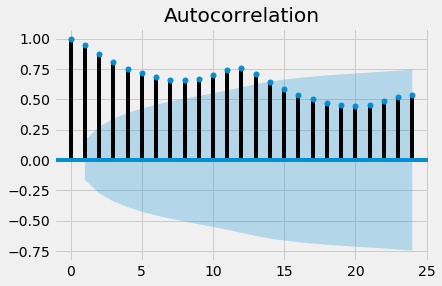

In [20]:
# Autocorrelation plot
fig = tsaplots.plot_acf(flights['passengers'], lags=24)

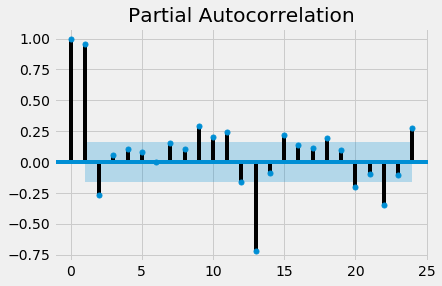

In [22]:
# Partial Autocorrelation
fig = tsaplots.plot_pacf(flights['passengers'], lags=24)

### Time Series Decomposition

https://en.wikipedia.org/wiki/Decomposition_of_time_series

Check other notebook for in-depth look into time series decomposition

In [26]:
import statsmodels.api as sm
from pylab import rcParams

In [24]:
decomposition = sm.tsa.seasonal_decompose(flights)

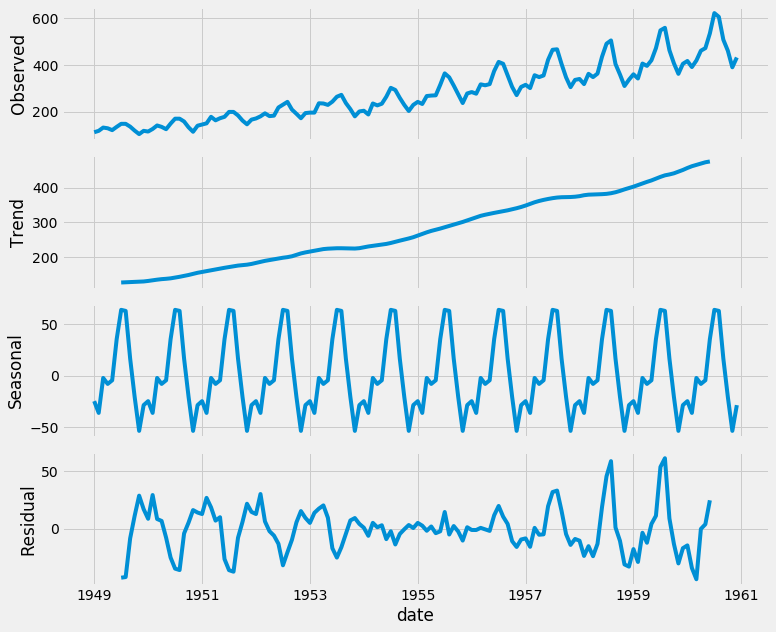

In [27]:
rcParams['figure.figsize'] = 11, 9
fig = decomposition.plot()
plt.show()

### Plot Individual Component

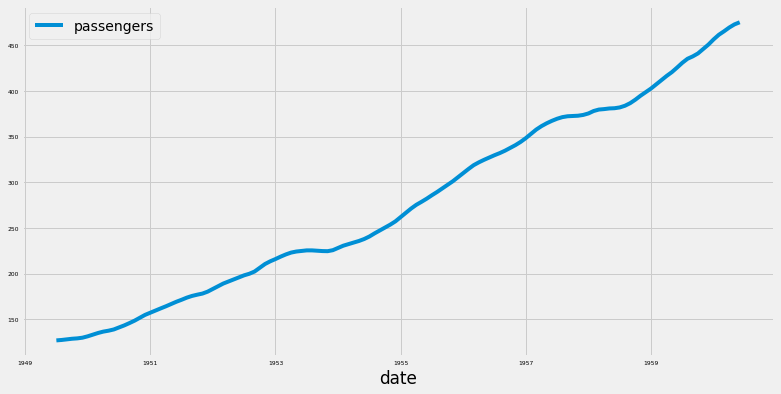

In [28]:
trend = decomposition.trend
ax = trend.plot(figsize=(12, 6), fontsize=6)
plt.show()